# 第１章：線形回帰モデル
### 回帰問題
ある入力（離散あるいは連続値）から出力（連続値）を予測する問題
- 直線で予測　➡︎　線形回帰
- 曲線で予測　➡︎　非線形回帰

### 回帰で扱うデータ
入力（各要素を説明変数または特徴量と呼ぶ）
- m次元のベクトル（m=1の場合はスカラ）

出力（目的変数）
- スカラー値（目的変数）


### 線形回帰モデル
入力とm次元パラメータの線形結合を出力するモデル
- 慣例として<span style="color: red; ">予測値</span>には<span style="color: red; ">ハット</span>を付ける（正解データとは異なる）


### 線形結合
入力とパラメータとの内積


### 説明変数が多次元の場合（m>1）
- 線形重回帰モデル
- 単回帰は直線　➡︎　重回帰は曲面

### 平均二乗誤差（残差平方和）
データとモデル出力の二乗誤差の和

### 最小二乗法
- 学習データの平均二乗誤差を最小とするパラメータを探索

# 実装演習

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 単回帰

In [22]:
n_sample = 100
var = .2

def linear_func(x):
    return 2 * x + 5

def add_noise(y_true, var):
    return y_true + np.random.normal(scale=var, size=y_true.shape)

def plt_result(xs_train, ys_true, ys_train):
    plt.scatter(xs_train, ys_train, facecolor="none", edgecolor="b", s=50,  label="training data")
    plt.plot(xs_train, ys_true, label="$2 x + 5$")
    plt.legend()

xs: (100,)
ys_true: (100,)
ys: (100,)


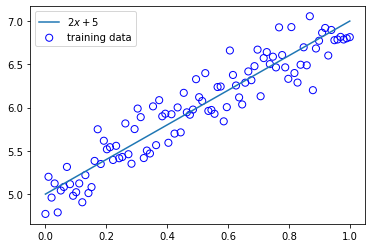

In [23]:
#データの作成
xs = np.linspace(0, 1, n_sample)
ys_true = linear_func(xs)
ys = add_noise(ys_true, var)

print("xs: {}".format(xs.shape))
print("ys_true: {}".format(ys_true.shape))
print("ys: {}".format(ys.shape))

#結果の描画
plt_result(xs, ys_true, ys)

## 学習

In [26]:
#numpy実装の回帰
def train(xs, ys):
    cov = np.cov(xs, ys, ddof=0) #共分散を求めてくれる関数np.cov()
    a = cov[0, 1] / cov[0, 0]
    b = np.mean(ys) - a * np.mean(xs)
    return cov, a, b

cov, a, b = train(xs, ys)
print("cov: {}".format(cov))
print("coef: {}".format(a)) #係数
print("intercept: {}".format(b)) #切片

cov: [[0.08501684 0.16478632]
 [0.16478632 0.35958563]]
coef: 1.9382787227573142
intercept: 5.019051729845837


In [27]:
#skl実装の回帰
from sklearn.linear_model import LinearRegression
model = LinearRegression()
reg = model.fit(xs.reshape(-1, 1), ys.reshape(-1, 1))

print("coef_: {}".format(reg.coef_))
print("intercept_: {}".format(reg.intercept_))

coef_: [[1.93827872]]
intercept_: [5.01905173]


## 予測

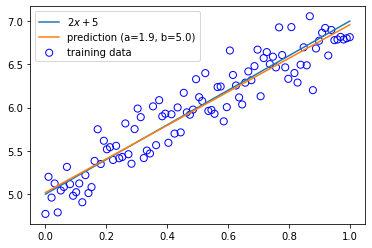

In [28]:
xs_new = np.linspace(0, 1, n_sample)
ys_pred = a * xs_new + b

plt.scatter(xs, ys, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(xs_new, ys_true, label="$2 x + 5$")
plt.plot(xs_new, ys_pred, label="prediction (a={:.2}, b={:.2})".format(a, b))
plt.legend()
plt.show()

## 多項式回帰

In [29]:
n_sample = 10
var = .25

def sin_func(x):
    return np.sin(2 * np.pi * x) 

def add_noise(y_true, var):
    return y_true + np.random.normal(scale=var, size=y_true.shape)

def plt_result(xs, ys_true, ys):
    plt.scatter(xs, ys,facecolor="none", edgecolor="b", s=50,  label="training data")
    plt.plot(xs, ys_true, label="$\sin(2\pi x)$")
    plt.legend()

xs: (10,)
ys_true: (10,)
ys: (10,)


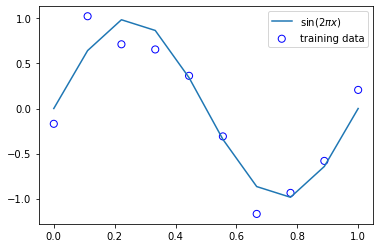

In [30]:
#データの作成
xs = np.linspace(0, 1, n_sample)
ys_true = sin_func(xs)
ys = add_noise(ys_true, var)

print("xs: {}".format(xs.shape))
print("ys_true: {}".format(ys_true.shape))
print("ys: {}".format(ys.shape))

#結果の描画
plt_result(xs, ys_true, ys)

## 学習

In [31]:
def polynomial_features(xs, degree=3):
    """多項式特徴ベクトルに変換
         X = [[1, x1, x1^2, x1^3],
                 [1, x2, x2^2, x2^3],
                   ...                             
                 [1, xn, xn^2, xn^3]]"""
    X = np.ones((len(xs), degree+1))
    X_t = X.T #(100, 4)
    for i in range(1, degree+1):
        X_t[i] = X_t[i-1] * xs
    return X_t.T

In [32]:
Phi = polynomial_features(xs)
Phi_inv = np.dot(np.linalg.inv(np.dot(Phi.T, Phi)), Phi.T)
w = np.dot(Phi_inv, ys)

## 予測

In [33]:
Phi_test = polynomial_features(xs)
ys_pred = np.dot(Phi_test, w)

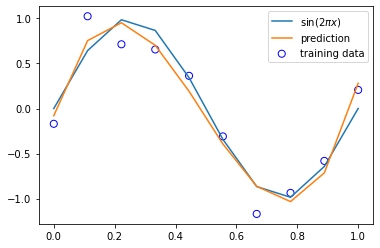

In [34]:
plt.scatter(xs, ys, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(xs, ys_true, label="$\sin(2\pi x)$")
plt.plot(xs, ys_pred, label="prediction")
# for i in range(0, 4):
#     plt.plot(xs, Phi[:, i], label="basis")
plt.legend()
plt.show()

## 重回帰

In [36]:
np.random.random((10, 3))

array([[0.82649628, 0.25574003, 0.67617145],
       [0.15991325, 0.44266476, 0.08584617],
       [0.57522694, 0.013868  , 0.13884753],
       [0.3238047 , 0.13056438, 0.46973316],
       [0.59427229, 0.13585094, 0.94956118],
       [0.45463596, 0.66521605, 0.95950655],
       [0.00891794, 0.62611296, 0.91371698],
       [0.43359274, 0.61493581, 0.92329254],
       [0.276463  , 0.70375695, 0.64247249],
       [0.24607507, 0.06977879, 0.14887584]])

In [37]:
n_sample = 100
var = .2

def mul_linear_func(x):
    ww = [1., 0.5, 2., 1.]
    return ww[0] + ww[1] * x[:, 0] + ww[2] * x[:, 1] + ww[3] * x[:, 2]

def add_noise(y_true, var):
    return y_true + np.random.normal(scale=var, size=y_true.shape)

def plt_result(xs_train, ys_true, ys_train):
    plt.scatter(xs_train, ys_train, facecolor="none", edgecolor="b", s=50,  label="training data")
    plt.plot(xs_train, ys_true, label="$2 x + 5$")
    plt.legend()

In [38]:
x_dim = 3

X = np.random.random((n_sample, x_dim))
ys_true = mul_linear_func(X)
ys = add_noise(ys_true, var)

## 学習

In [45]:
def add_one(x):
    return np.concatenate([np.ones(len(x))[:, None], x], axis=1)

X_train = add_one(X)
# pinv = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T)
# w = np.dot(pinv, y_train)

## 予測

In [46]:
ww = [1., 0.5, 2., 1.]

In [47]:
for i in range(len(w)):
    print("w{0}_true: {1:>5.2}   w{0}_estimated: {2:>5.2}".format(i, ww[i], w[i]))

w0_true:   1.0   w0_estimated: -0.079
w1_true:   0.5   w1_estimated: 1.1e+01
w2_true:   2.0   w2_estimated: -3.3e+01
w3_true:   1.0   w3_estimated: 2.3e+01


<h1>線形回帰モデル-Boston Hausing Data-</h1>

In [48]:
from sklearn.datasets import load_boston
from pandas import DataFrame
import numpy as np

In [49]:
# ボストンデータを"boston"というインスタンスにインポート
boston = load_boston()
#インポートしたデータを確認(data / target / feature_names / DESCR)
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [50]:
#DESCR変数の中身を確認
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [51]:
#feature_names変数の中身を確認
#カラム名
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [52]:
#data変数(説明変数)の中身を確認
print(boston['data'])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [53]:
#target変数(目的変数)の中身を確認
print(boston['target'])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

<h2>2. データフレームの作成</h2>

In [54]:
#　説明変数らをDataFrameへ変換
df = DataFrame(data=boston.data, columns = boston.feature_names)

In [55]:
# 目的変数をDataFrameへ追加
df['PRICE'] = boston.target
# 最初の5行を表示
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<h1>線形単回帰分析</h1>

In [56]:
#カラムを指定してデータを表示
df[['RM']].head()

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [58]:
# 説明変数
data = df.loc[:, ['RM']].values
#dataリストの表示(1-5)
data[0:5]

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147]])

In [61]:
# 目的変数
target = df.loc[:, 'PRICE'].values
target[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [62]:
## sklearnモジュールからLinearRegressionをインポート
from sklearn.linear_model import LinearRegression

# オブジェクト生成
model = LinearRegression()
#model.get_params()
#model = LinearRegression(fit_intercept = True, normalize = False, copy_X = True,  n_jobs = 1)

In [64]:
# fit関数でパラメータ推定
model.fit(data, target)
#予測
model.predict([[1]])

array([-25.5685118])

<h1>重回帰分析(2変数)</h1>

In [66]:
#カラムを指定してデータを表示
df[['CRIM', 'RM']].head()

,CRIM,RM
0,0.00632,6.575
1,0.02731,6.421
2,0.02729,7.185
3,0.03237,6.998
4,0.06905,7.147


In [67]:
# 説明変数
data2 = df.loc[:, ['CRIM', 'RM']].values
# 目的変数
target2 = df.loc[:, 'PRICE'].values

In [68]:
# オブジェクト生成
model2 = LinearRegression()
# fit関数でパラメータ推定
model2.fit(data2, target2)
model2.predict([[0.2, 7]])

array([29.43977562])

<h1>回帰係数と切片の値を確認</h1>

In [70]:
# 単回帰の回帰係数と切片を出力
print('推定された回帰係数: %.3f, 推定された切片 : %.3f' % (model.coef_, model.intercept_))
# 重回帰の回帰係数と切片を出力
print(model.coef_)
print(model.intercept_)

推定された回帰係数: 9.102, 推定された切片 : -34.671
[9.10210898]
-34.670620776438554


# 決定係数

In [71]:
# train_test_splitをインポート
from sklearn.model_selection import train_test_split

In [72]:
# 70%を学習用、30%を検証用データにするよう分割
X_train, X_test, y_train, y_test = train_test_split(data, target, 
test_size = 0.3, random_state = 666)
# 学習用データでパラメータ推定
model.fit(X_train, y_train)
# 作成したモデルから予測（学習用、検証用モデル使用）
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

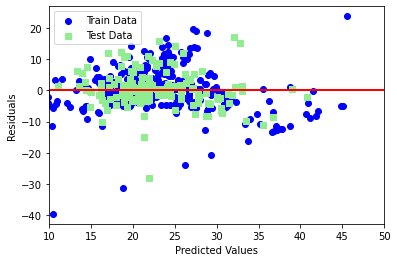

In [73]:
# matplotlibをインポート
import matplotlib.pyplot as plt
# Jupyterを利用していたら、以下のおまじないを書くとnotebook上に図が表示
%matplotlib inline
# 学習用、検証用それぞれで残差をプロット
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Train Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
# 凡例を左上に表示
plt.legend(loc = 'upper left')
# y = 0に直線を引く
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([10, 50])
plt.show()

In [74]:
# 平均二乗誤差を評価するためのメソッドを呼び出し
from sklearn.metrics import mean_squared_error
# 学習用、検証用データに関して平均二乗誤差を出力
print('MSE Train : %.3f, Test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
# 学習用、検証用データに関してR^2を出力
print('R^2 Train : %.3f, Test : %.3f' % (model.score(X_train, y_train), model.score(X_test, y_test)))

MSE Train : 44.983, Test : 40.412
R^2 Train : 0.500, Test : 0.434


# 第２章：非線形モデル

### 基底展開法
回帰関数として、基底関数と呼ばれる既知の非線形関数とパラメータベクトルの線型結合を使用
  
### よく使われる基底関数
- 多項式関数
- ガウス型基底関数
- スプライン関数/Bスプライン関数

### 未学習（underfitting）
学習データに対して、十分小さな誤差が得られないモデル→未学習

### 過学習（overfitting）
小さな誤差は得られたけど、テスト集合誤差との差が大きいモデル→過学習

### 不要な基底関数を削除
基底関数の数、位置やバンド幅によりモデルの複雑差が変化する。解きたい問題に対して多くの基底関数を用意してしまうと過学習の問題が起こる為、基底関数を適切に用意する。

### 正則化法（罰則化法）
モデルの複雑さに伴って、その値が大きくなる正則化項（罰則項）を課した関数を最小化する。
- 正則化項（罰則項）の役割
 * 無い　➡︎　最小二乗推定量
 * L2ノルムを利用　➡︎　Ridge推定量
 * L1ノルムを利用　➡︎　Lasso推定量<br>
 
- 正則化パラメータの役割
 - 小さく　➡︎　制約面が大きく
 - 大きく　➡︎　制約面が小さく
 

### 汎化性能
学習に使用した入力だけでなく、これまで見たことのない新たな入力に対する予測性能

### ホールドアウト法
有限のデータを学習用とテスト用の二つに分割し、予測精度や誤り率を推定する為に使用
- <span style="color: red; ">手元にデータが大量にある場合を除いて、良い性能評価を与えないという欠点</span>がある。

### クロスバリデーション（交差検証）
データを学習用とテスト用に分割する処理を複数回繰り返し、各モデルの平均精度をとる。

### グリッドサーチ
全てのチューニングパラメータの組み合わせで評価値を算出する。

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [76]:
#seaborn設定
sns.set()
#背景変更
sns.set_style("darkgrid", {'grid.linestyle': '--'})
#大きさ(スケール変更)
sns.set_context("paper")

In [77]:
n=100

def true_func(x):
    z = 1-48*x+218*x**2-315*x**3+145*x**4
    return z 

def linear_func(x):
    z = x
    return z 

No handles with labels found to put in legend.


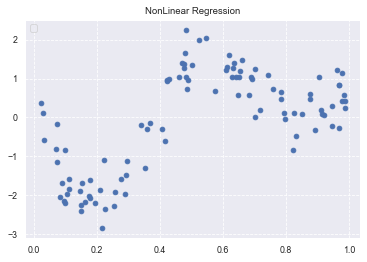

In [78]:
# 真の関数からノイズを伴うデータを生成

# 真の関数からデータ生成
data = np.random.rand(n).astype(np.float32)
data = np.sort(data)
target = true_func(data)

# 　ノイズを加える
noise = 0.5 * np.random.randn(n) 
target = target  + noise

# ノイズ付きデータを描画

plt.scatter(data, target)

plt.title('NonLinear Regression')
plt.legend(loc=2)

0.3804276228447907


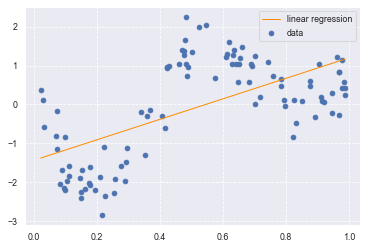

In [79]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
data = data.reshape(-1,1)
target = target.reshape(-1,1)
clf.fit(data, target)

p_lin = clf.predict(data)

plt.scatter(data, target, label='data')
plt.plot(data, p_lin, color='darkorange', marker='', linestyle='-', linewidth=1, markersize=6, label='linear regression')
plt.legend()
print(clf.score(data, target))

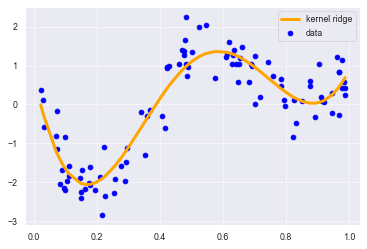

In [80]:
from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(alpha=0.0002, kernel='rbf')
clf.fit(data, target)

p_kridge = clf.predict(data)

plt.scatter(data, target, color='blue', label='data')

plt.plot(data, p_kridge, color='orange', linestyle='-', linewidth=3, markersize=6, label='kernel ridge')
plt.legend()
#plt.plot(data, p, color='orange', marker='o', linestyle='-', linewidth=1, markersize=6)

0.8611114996798361


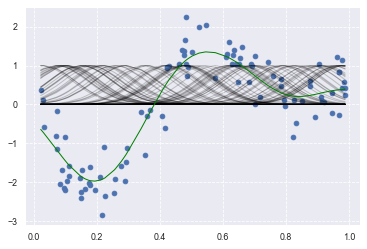

In [81]:
#Ridge

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

kx = rbf_kernel(X=data, Y=data, gamma=50)
#KX = rbf_kernel(X, x)

#clf = LinearRegression()
clf = Ridge(alpha=30)
clf.fit(kx, target)

p_ridge = clf.predict(kx)

plt.scatter(data, target,label='data')
for i in range(len(kx)):
    plt.plot(data, kx[i], color='black', linestyle='-', linewidth=1, markersize=3, label='rbf', alpha=0.2)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_ridge, color='green', linestyle='-', linewidth=1, markersize=3,label='ridge regression')
#plt.legend()

print(clf.score(kx, target))

In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

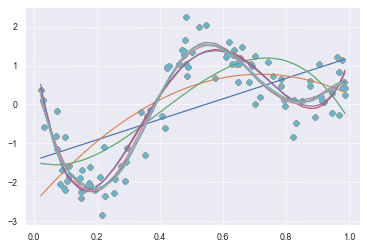

In [83]:
#PolynomialFeatures(degree=1)

deg = [1,2,3,4,5,6,7,8,9,10]
for d in deg:
    regr = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('linear', LinearRegression())
    ])
    regr.fit(data, target)
    # make predictions
    p_poly = regr.predict(data)
    # plot regression result
    plt.scatter(data, target, label='data')
    plt.plot(data, p_poly, label='polynomial of degree %d' % (d))

-2.220446049250313e-16


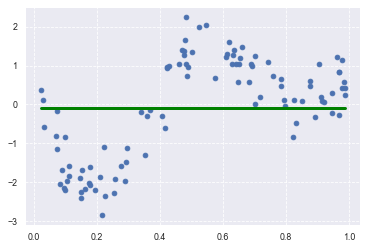

In [84]:
#Lasso

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx = rbf_kernel(X=data, Y=data, gamma=5)
#KX = rbf_kernel(X, x)

#lasso_clf = LinearRegression()
lasso_clf = Lasso(alpha=10000, max_iter=1000)
lasso_clf.fit(kx, target)

p_lasso = lasso_clf.predict(kx)

plt.scatter(data, target)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_lasso, color='green', linestyle='-', linewidth=3, markersize=3)

print(lasso_clf.score(kx, target))

/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


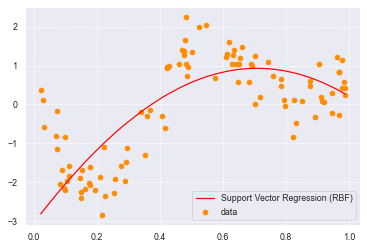

In [85]:
from sklearn import model_selection, preprocessing, linear_model, svm

# SVR-rbf
clf_svr = svm.SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)
clf_svr.fit(data, target)
y_rbf = clf_svr.fit(data, target).predict(data)
 
# plot

plt.scatter(data, target, color='darkorange', label='data')
plt.plot(data, y_rbf, color='red', label='Support Vector Regression (RBF)')
plt.legend()
plt.show()

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)

In [87]:
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

cb_cp = ModelCheckpoint('/Users/takahashihideyuki/ラビットチャレンジ/study_ai_ml_google/skl_ml/out/checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_weights_only=True)
cb_tf  = TensorBoard(log_dir='/Users/takahashihideyuki/ラビットチャレンジ/study_ai_ml_google/skl_ml/out/tensorBoard', histogram_freq=0)

Using TensorFlow backend.
/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

In [88]:
def relu_reg_model():
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='linear'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [89]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor

# use data split and fit to run the model
estimator = KerasRegressor(build_fn=relu_reg_model, epochs=100, batch_size=5, verbose=1)

history = estimator.fit(x_train, y_train, callbacks=[cb_cp, cb_tf], validation_data=(x_test, y_test))


Train on 90 samples, validate on 10 samples


Epoch 1/100
90/90 [==============================] - 1s 13ms/step - loss: 1.6431 - val_loss: 1.2624

Epoch 00001: saving model to /Users/takahashihideyuki/ラビットチャレンジ/study_ai_ml_google/skl_ml/out/checkpoints/weights.01-1.26.hdf5

Epoch 2/100
90/90 [==============================] - 1s 10ms/step - loss: 1.1259 - val_loss: 0.4059

Epoch 00002: saving model to /Users/takahashihideyuki/ラビットチャレンジ/study_ai_ml_google/skl_ml/out/checkpoints/weights.02-0.41.hdf5
Epoch 3/100
90/90 [==============================] - 1s 9ms/step - loss: 0.7987 - val_loss: 0.5067

Epoch 00003: saving model to /Users/takahashihideyuki/ラビットチャレンジ/study_ai_ml_google/skl_ml/out/checkpoints/weights.03-0.51.hdf5
Epoch 4/100
90/90 [==============================] - 1s 9ms/step - loss: 0.7271 - val_loss: 0.3773

Epoch 00004: saving model to /Users/takahashihideyuki/ラビットチャレンジ/study_ai_ml_google/skl_ml/out/checkpoints/weights.04-0.38.hdf5
Epoch 5/100
90/90 [===============

Epoch 68/100
90/90 [==============================] - 1s 13ms/step - loss: 0.4176 - val_loss: 0.2819

Epoch 00068: saving model to /Users/takahashihideyuki/ラビットチャレンジ/study_ai_ml_google/skl_ml/out/checkpoints/weights.68-0.28.hdf5
Epoch 69/100
90/90 [==============================] - 1s 13ms/step - loss: 0.3533 - val_loss: 0.2020

Epoch 00069: saving model to /Users/takahashihideyuki/ラビットチャレンジ/study_ai_ml_google/skl_ml/out/checkpoints/weights.69-0.20.hdf5
Epoch 70/100
90/90 [==============================] - 1s 14ms/step - loss: 0.3077 - val_loss: 0.2739

Epoch 00070: saving model to /Users/takahashihideyuki/ラビットチャレンジ/study_ai_ml_google/skl_ml/out/checkpoints/weights.70-0.27.hdf5
Epoch 71/100
90/90 [==============================] - 1s 14ms/step - loss: 0.3423 - val_loss: 0.2427

Epoch 00071: saving model to /Users/takahashihideyuki/ラビットチャレンジ/study_ai_ml_google/skl_ml/out/checkpoints/weights.71-0.24.hdf5
Epoch 72/100
90/90 [==============================] - 1s 14ms/step - loss: 0

In [90]:
y_pred = estimator.predict(x_train)

90/90 [==============================] - 0s 1ms/step


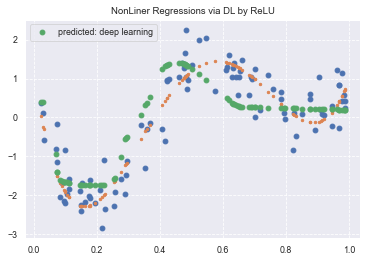

In [92]:
plt.title('NonLiner Regressions via DL by ReLU')
plt.plot(data, target, 'o')
plt.plot(data, true_func(data), '.')
plt.plot(x_train, y_pred, "o", label='predicted: deep learning')
plt.legend(loc=2)

In [93]:
print(lasso_clf.coef_)

[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


# 第3章：ロジスティック回帰モデル

### 分類問題（クラス分類）
ある入力（数値）からクラスに分類する問題

### 分類で扱うデータ
入力（各要素を説明変数または特徴量と呼ぶ）
- m次元のベクトル（m=1の場合はスカラ）

出力（目的変数）
- 0 or 1の値

### ロジスティック線形回帰モデル
分類問題を解くための教師あり機械学習モデル（教師データから学習）
- 入力とm次元パラメータの線形結合をシグモイド関数に入力
- 出力はy=1になる確率になる

### シグモイド関数
- 入力は実数、出力は必ず0-1の値
- （クラス１に分類される）確率を表現
- 単調増加関数
- シグモイド関数の微分は、シグモイド関数自身で表現することが可能

### 勾配降下法（Gradient descent）
反復学習によりパラメータを逐次的に更新するアプローチの一つ

### 確率的勾配降下法（SDG）
- データを一つずつランダムに（確率的に）選んでパラメータを更新
- 勾配降下法でパラメータを１回更新するのと同じ計算量でパラメータをn回更新できるので効率よく最適な解を探索可能

<h1>0. データ表示</h1>

In [95]:
#from モジュール名 import クラス名（もしくは関数名や変数名）
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlibをinlineで表示するためのおまじない (plt.show()しなくていい)
%matplotlib inline

In [96]:
# titanic data csvファイルの読み込み
titanic_df = pd.read_csv('/Users/takahashihideyuki/ラビットチャレンジ/study_ai_ml_google/data/titanic_train.csv')

In [97]:
# ファイルの先頭部を表示し、データセットを確認する
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h1>1. ロジスティック回帰</h1>
<h3>不要なデータの削除・欠損値の補完</h3>

In [98]:
#予測に不要と考えるからうをドロップ (本当はここの情報もしっかり使うべきだと思っています)
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

#一部カラムをドロップしたデータを表示
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [99]:
#nullを含んでいる行を表示
titanic_df[titanic_df.isnull().any(1)].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
29,0,3,male,NaN,0,0,7.8958,S
31,1,1,female,NaN,1,0,146.5208,C
32,1,3,female,NaN,0,0,7.7500,Q
36,1,3,male,NaN,0,0,7.2292,C
42,0,3,male,NaN,0,0,7.8958,C


In [100]:
#Ageカラムのnullを中央値で補完

titanic_df['AgeFill'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

#再度nullを含んでいる行を表示 (Ageのnullは補完されている)
titanic_df[titanic_df.isnull().any(1)]

#titanic_df.dtypes

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill
5,0,3,male,NaN,0,0,8.4583,Q,29.699118
17,1,2,male,NaN,0,0,13.0000,S,29.699118
19,1,3,female,NaN,0,0,7.2250,C,29.699118
26,0,3,male,NaN,0,0,7.2250,C,29.699118
28,1,3,female,NaN,0,0,7.8792,Q,29.699118
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,29.699118
863,0,3,female,NaN,8,2,69.5500,S,29.699118
868,0,3,male,NaN,0,0,9.5000,S,29.699118
878,0,3,male,NaN,0,0,7.8958,S,29.699118


<h1>1. ロジスティック回帰</h1>
<h3>実装(チケット価格から生死を判別)</h3>

In [101]:
#運賃だけのリストを作成
data1 = titanic_df.loc[:, ["Fare"]].values

In [102]:
#生死フラグのみのリストを作成
label1 =  titanic_df.loc[:,["Survived"]].values

In [103]:
from sklearn.linear_model import LogisticRegression

In [106]:
model=LogisticRegression()
model.fit(data1, label1)
model.predict([[61]])

/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0])

In [107]:
model.predict_proba([[62]])

array([[0.49978123, 0.50021877]])

In [108]:
X_test_value = model.decision_function(data1) 

In [109]:
# # 決定関数値（絶対値が大きいほど識別境界から離れている）
# X_test_value = model.decision_function(X_test) 
# # 決定関数値をシグモイド関数で確率に変換
# X_test_prob = normal_sigmoid(X_test_value) 

In [111]:
print (model.intercept_)
print (model.coef_)

[-0.94131796]
[[0.01519666]]


No handles with labels found to put in legend.


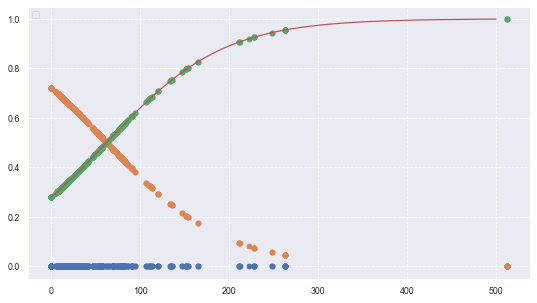

In [112]:
w_0 = model.intercept_[0]
w_1 = model.coef_[0,0]

# def normal_sigmoid(x):
#     return 1 / (1+np.exp(-x))

def sigmoid(x):
    return 1 / (1+np.exp(-(w_1*x+w_0)))

x_range = np.linspace(-1, 500, 3000)

plt.figure(figsize=(9,5))
#plt.xkcd()
plt.legend(loc=2)


# plt.ylim(-0.1, 1.1)
# plt.xlim(-10, 10)

# plt.plot([-10,10],[0,0], "k", lw=1)
# plt.plot([0,0],[-1,1.5], "k", lw=1)
plt.plot(data1,np.zeros(len(data1)), 'o')
plt.plot(data1, model.predict_proba(data1), 'o')
plt.plot(x_range, sigmoid(x_range), '-')
#plt.plot(x_range, normal_sigmoid(x_range), '-')

<h1>1. ロジスティック回帰</h1>
<h3>実装(2変数から生死を判別)</h3>

In [113]:
#AgeFillの欠損値を埋めたので
#titanic_df = titanic_df.drop(['Age'], axis=1)

In [114]:
titanic_df['Gender'] = titanic_df['Sex'].map({'female': 0, 'male': 1}).astype(int)

In [115]:
titanic_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill,Gender
0,0,3,male,22.0,1,0,7.2500,S,22.0,1
1,1,1,female,38.0,1,0,71.2833,C,38.0,0
2,1,3,female,26.0,0,0,7.9250,S,26.0,0


In [116]:
titanic_df['Pclass_Gender'] = titanic_df['Pclass'] + titanic_df['Gender']

In [117]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill,Gender,Pclass_Gender
0,0,3,male,22.0,1,0,7.2500,S,22.0,1,4
1,1,1,female,38.0,1,0,71.2833,C,38.0,0,1
2,1,3,female,26.0,0,0,7.9250,S,26.0,0,3
3,1,1,female,35.0,1,0,53.1000,S,35.0,0,1
4,0,3,male,35.0,0,0,8.0500,S,35.0,1,4


In [118]:
titanic_df = titanic_df.drop(['Pclass', 'Sex', 'Gender','Age'], axis=1)

In [119]:
titanic_df.head()

,Survived,SibSp,Parch,Fare,Embarked,AgeFill,Pclass_Gender
0,0,1,0,7.2500,S,22.0,4
1,1,1,0,71.2833,C,38.0,1
2,1,0,0,7.9250,S,26.0,3
3,1,1,0,53.1000,S,35.0,1
4,0,0,0,8.0500,S,35.0,4


In [120]:
# 重要だよ！！！
# 境界線の式
#   w_1・x + w_2・y + w_0 = 0
#   ⇒ y = (-w_1・x - w_0) / w_2
 
# # 境界線 プロット
# plt.plot([-2,2], map(lambda x: (-w_1 * x - w_0)/w_2, [-2,2]))
 
# # データを重ねる
# plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
# plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
# plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
# plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')

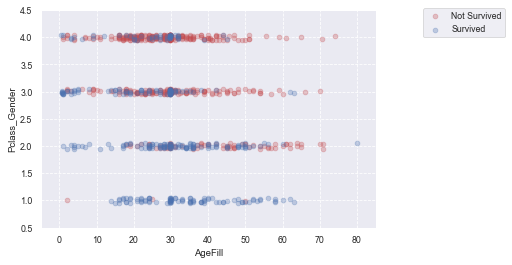

In [121]:
np.random.seed = 0

xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5

index_survived = titanic_df[titanic_df["Survived"]==0].index
index_notsurvived = titanic_df[titanic_df["Survived"]==1].index

from matplotlib.colors import ListedColormap
fig, ax = plt.subplots()
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
sc = ax.scatter(titanic_df.loc[index_survived, 'AgeFill'],
                titanic_df.loc[index_survived, 'Pclass_Gender']+(np.random.rand(len(index_survived))-0.5)*0.1,
                color='r', label='Not Survived', alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
                titanic_df.loc[index_notsurvived, 'Pclass_Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color='b', label='Survived', alpha=0.3)
ax.set_xlabel('AgeFill')
ax.set_ylabel('Pclass_Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.legend(bbox_to_anchor=(1.4, 1.03))

In [122]:
#運賃だけのリストを作成
data2 = titanic_df.loc[:, ["AgeFill", "Pclass_Gender"]].values

In [123]:
data2

array([[22.        ,  4.        ],
       [38.        ,  1.        ],
       [26.        ,  3.        ],
       ...,
       [29.69911765,  3.        ],
       [26.        ,  2.        ],
       [32.        ,  4.        ]])

In [124]:
#生死フラグのみのリストを作成
label2 =  titanic_df.loc[:,["Survived"]].values

In [125]:
model2 = LogisticRegression()
model2.fit(data2, label2)

/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [126]:
model2.predict([[10,1]])

array([1])

In [127]:
model2.predict_proba([[10,1]])

array([[0.03754749, 0.96245251]])

In [128]:
titanic_df.head(3)

,Survived,SibSp,Parch,Fare,Embarked,AgeFill,Pclass_Gender
0,0,1,0,7.2500,S,22.0,4
1,1,1,0,71.2833,C,38.0,1
2,1,0,0,7.9250,S,26.0,3


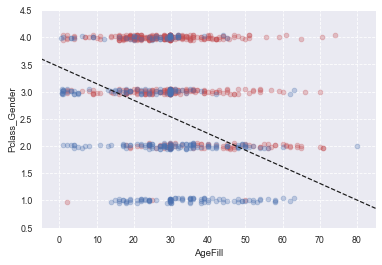

In [129]:
h = 0.02
xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))
Z = model2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
levels = np.linspace(0, 1.0)
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#contour = ax.contourf(xx, yy, Z, cmap=cm, levels=levels, alpha=0.5)

sc = ax.scatter(titanic_df.loc[index_survived, 'AgeFill'],
                titanic_df.loc[index_survived, 'Pclass_Gender']+(np.random.rand(len(index_survived))-0.5)*0.1,
                color='r', label='Not Survived', alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
                titanic_df.loc[index_notsurvived, 'Pclass_Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color='b', label='Survived', alpha=0.3)

ax.set_xlabel('AgeFill')
ax.set_ylabel('Pclass_Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
#fig.colorbar(contour)

x1 = xmin
x2 = xmax
y1 = -1*(model2.intercept_[0]+model2.coef_[0][0]*xmin)/model2.coef_[0][1]
y2 = -1*(model2.intercept_[0]+model2.coef_[0][0]*xmax)/model2.coef_[0][1]
ax.plot([x1, x2] ,[y1, y2], 'k--')

<h1>2. モデル評価</h1>
<h3>混同行列とクロスバリデーション</h3>

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
traindata1, testdata1, trainlabel1, testlabel1 = train_test_split(data1, label1, test_size=0.2)
traindata1.shape
trainlabel1.shape

(712, 1)

In [133]:
traindata2, testdata2, trainlabel2, testlabel2 = train_test_split(data2, label2, test_size=0.2)
traindata2.shape
trainlabel2.shape
#本来は同じデータセットを分割しなければいけない。(簡易的に別々に分割している。)

(712, 1)

In [134]:
data = titanic_df.loc[:, ].values
label =  titanic_df.loc[:,["Survived"]].values
traindata, testdata, trainlabel, testlabel = train_test_split(data, label, test_size=0.2)
traindata.shape
trainlabel.shape

(712, 1)

In [135]:
eval_model1=LogisticRegression()
eval_model2=LogisticRegression()
#eval_model=LogisticRegression()

In [136]:
predictor_eval1=eval_model1.fit(traindata1, trainlabel1).predict(testdata1)
predictor_eval2=eval_model2.fit(traindata2, trainlabel2).predict(testdata2)
#predictor_eval=eval_model.fit(traindata, trainlabel).predict(testdata)

/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [137]:
eval_model1.score(traindata1, trainlabel1)

0.6587078651685393

In [138]:
eval_model1.score(testdata1,testlabel1)

0.6871508379888268

In [139]:
eval_model2.score(traindata2, trainlabel2)

0.7823033707865169

In [140]:
eval_model2.score(testdata2,testlabel2)

0.7541899441340782

In [141]:
from sklearn import metrics
print(metrics.classification_report(testlabel1, predictor_eval1))
print(metrics.classification_report(testlabel2, predictor_eval2))

              precision    recall  f1-score   support

           0       0.69      0.91      0.79       114
           1       0.66      0.29      0.40        65

    accuracy                           0.69       179
   macro avg       0.67      0.60      0.60       179
weighted avg       0.68      0.69      0.65       179

              precision    recall  f1-score   support

           0       0.76      0.85      0.81       107
           1       0.73      0.61      0.67        72

    accuracy                           0.75       179
   macro avg       0.75      0.73      0.74       179
weighted avg       0.75      0.75      0.75       179



In [142]:
from sklearn.metrics import confusion_matrix
confusion_matrix1=confusion_matrix(testlabel1, predictor_eval1)
confusion_matrix2=confusion_matrix(testlabel2, predictor_eval2)

In [143]:
confusion_matrix1

array([[104,  10],
       [ 46,  19]])

In [144]:
confusion_matrix2

array([[91, 16],
       [28, 44]])

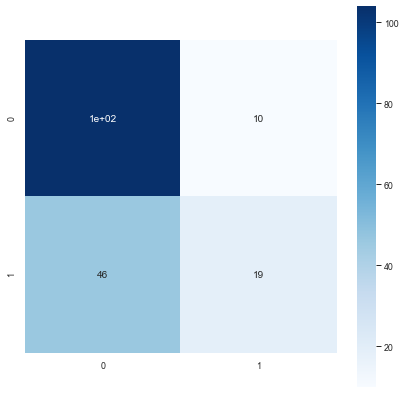

In [145]:
fig = plt.figure(figsize = (7,7))
#plt.title(title)
sns.heatmap(
    confusion_matrix1,
    vmin=None,
    vmax=None,
    cmap="Blues",
    center=None,
    robust=False,
    annot=True, fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=True, ax=None, 
    #xticklabels=columns,
    #yticklabels=columns,
    mask=None)

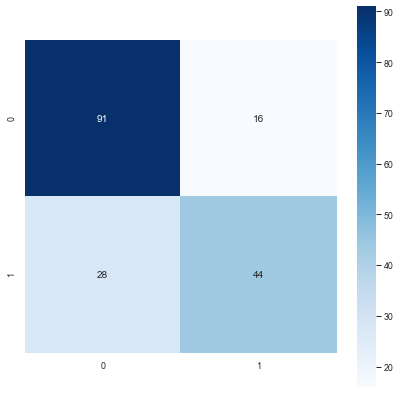

In [146]:
fig = plt.figure(figsize = (7,7))
#plt.title(title)
sns.heatmap(
    confusion_matrix2,
    vmin=None,
    vmax=None,
    cmap="Blues",
    center=None,
    robust=False,
    annot=True, fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=True, ax=None, 
    #xticklabels=columns,
    #yticklabels=columns,
    mask=None)

/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/seaborn/axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


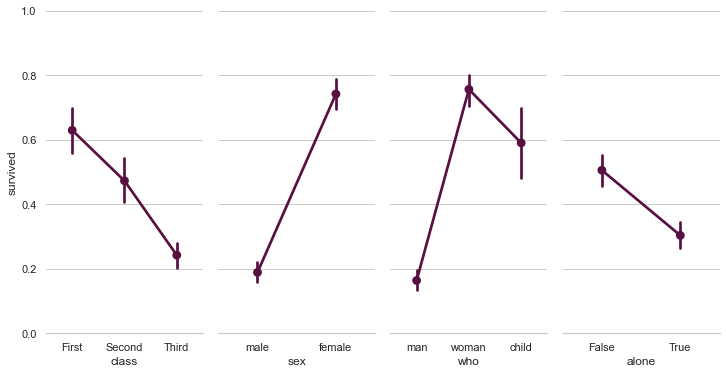

In [147]:
#Paired categorical plots

import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(titanic, y_vars="survived",
                 x_vars=["class", "sex", "who", "alone"],
                 size=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

plt.show()

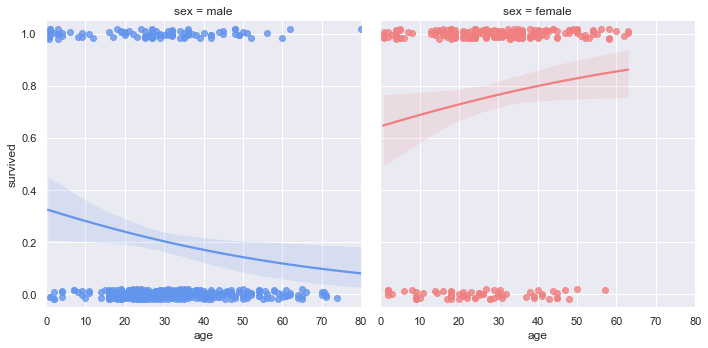

In [148]:
#Faceted logistic regression

import seaborn as sns
sns.set(style="darkgrid")

# Load the example titanic dataset
df = sns.load_dataset("titanic")

# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")

# Show the survival proability as a function of age and sex
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))
plt.show()

# 第4章：主成分分析

### 主成分分析（principal component analysis、PCA）
高次元のデータに対して分散が大きくなる方向（データが散らばっている方向）を探して、元の次元と同じかそれよりも低い次元にデータを変換する手法

### 多変量データの持つ構造をより少数個の指標に圧縮
- 変量の個数を減らすことに伴う、情報の損失はなるべく小さくしたい
- 少数変数を利用した分析や可視化（２・３次元の場合）が実現可能

### 係数ベクトルが変われば線形変換後の値が変化
- 情報の量を分散の大きさと捉える
- 線形変換後の変数の分散が最大となる射影軸を探索

In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [150]:
cancer_df = pd.read_csv('/Users/takahashihideyuki/ラビットチャレンジ/study_ai_ml_google/data/cancer.csv')

In [151]:
print('cancer df shape: {}'.format(cancer_df.shape))

cancer df shape: (569, 33)


In [152]:
cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [153]:
cancer_df.drop('Unnamed: 32', axis=1, inplace=True)
cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [154]:
# 目的変数の抽出
y = cancer_df.diagnosis.apply(lambda d: 1 if d == 'M' else 0)

In [155]:
# 説明変数の抽出
X = cancer_df.loc[:, 'radius_mean':]

In [156]:
# 学習用とテスト用でデータを分離
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ロジスティック回帰で学習
logistic = LogisticRegressionCV(cv=10, random_state=0)
logistic.fit(X_train_scaled, y_train)

# 検証
print('Train score: {:.3f}'.format(logistic.score(X_train_scaled, y_train)))
print('Test score: {:.3f}'.format(logistic.score(X_test_scaled, y_test)))
print('Confustion matrix:\n{}'.format(confusion_matrix(y_true=y_test, y_pred=logistic.predict(X_test_scaled))))

/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative so

Train score: 0.988
Test score: 0.972
Confustion matrix:
[[89  1]
 [ 3 50]]


/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative so

<BarContainer object of 30 artists>

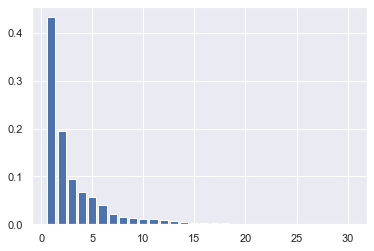

In [157]:
pca = PCA(n_components=30)
pca.fit(X_train_scaled)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)

X_train_pca shape: (426, 2)
explained variance ratio: [0.43315126 0.19586506]


Text(0, 0.5, 'PC 2')

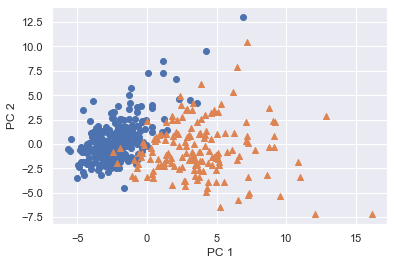

In [158]:
# PCA
# 次元数2まで圧縮
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
print('X_train_pca shape: {}'.format(X_train_pca.shape))
# X_train_pca shape: (426, 2)

# 寄与率
print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))
# explained variance ratio: [ 0.43315126  0.19586506]

# 散布図にプロット
temp = pd.DataFrame(X_train_pca)
temp['Outcome'] = y_train.values
b = temp[temp['Outcome'] == 0]
m = temp[temp['Outcome'] == 1]
plt.scatter(x=b[0], y=b[1], marker='o') # 良性は○でマーク
plt.scatter(x=m[0], y=m[1], marker='^') # 悪性は△でマーク
plt.xlabel('PC 1') # 第1主成分をx軸
plt.ylabel('PC 2') # 第2主成分をy軸

# 第5章：アルゴリズム

### ｋ近傍法（ｋNN）
最近傍のデータをｋ個取ってきて、それらが最も多く所属するクラスに識別する
- kはハイパーパラメータであり、kにより結果が変わる
- ｋを大きくすると決定境界は滑らかになる

### k-平均法（k-means）
1. 各クラスタ中心の初期値を設定する
2. 各データ点に対して、各クラスタ中心との距離を計算し、最も距離が近いクラスタを割り当てる
3. 各クラスタの平均ベクトル（中心）を計算する
4. 収束するまで2,3の処理を繰り返す
  
  
- 教師なし学習
- クラスタリング手法
- 与えられたデータをk個のクラスタに分類する
- kはハイパーパラメータであり、kにより結果が変わる

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, preprocessing, datasets
from sklearn.cluster import KMeans

In [162]:
wine = datasets.load_wine()
X = wine.data
X.shape

(178, 13)

In [163]:
y=wine.target
y.shape

(178,)

In [164]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [165]:
model = KMeans(n_clusters=3)
labels = model.fit_predict(X)

In [166]:
df = pd.DataFrame({'labels': labels})
type(df)

pandas.core.frame.DataFrame

In [167]:
def species_label(theta):
    if theta == 0:
        return wine.target_names[0]
    if theta == 1:
        return wine.target_names[1]
    if theta == 2:
        return wine.target_names[2]

In [168]:
df['species'] = [species_label(theta) for theta in wine.target]

In [169]:
pd.crosstab(df['labels'], df['species'])

species,class_0,class_1,class_2
labels,,,
0,0,50,19
1,46,1,0
2,13,20,29


# 第7章：サポートベクターマシン

### サポートベクターマシン（SVM）
サポートベクターマシン（support vecter machine、　SVM）は、分類・回帰だけでなく、外れ値検出にも使えるアルゴリズムである。
２つのクラスのデータを直線で分離する場合に、この直線とそれに最も近い各クラスのデータ間の距離が最も大きくなるように直線を引く。この直線のことを決定境界、各クラスのデータをサポートベクタ、そしてクラス間のサポートベクタの距離をマージンと呼ぶ。サポートベクターマシンはマージンを最大にすることにより決定境界を求める。

[![study-ai](https://github.com/hideyuki-takahashi-s13/rabbit_challenge/blob/main/bnr_jdla.png)](https://study-ai.com/jdla/)